In [42]:
import pandas as pd
import numpy as np

In [43]:
ap_data = pd.read_excel("air_log_7.xlsx")

In [44]:
ap_data

,Unnamed: 0,date,all_num,temp,humid,co2,voc,pm25,light,noise,강수량,비,기온,풍속,date_day,date_hour,date_minute,date_weekday
0,0,2019-09-20 00:00:00,1,25.825,41.575,4241.525,525.225,0,126.975,49.950,0.0,0,20.900000,0.7,20,0,0,4
1,1,2019-09-20 01:00:00,0,25.975,42.825,3801.725,506.225,0,0.000,49.975,0.0,0,22.100000,0.8,20,1,0,4
2,2,2019-09-20 02:00:00,0,26.100,43.450,3427.850,486.750,0,0.000,49.950,0.0,0,22.500000,0.2,20,2,0,4
3,3,2019-09-20 03:00:00,0,25.750,46.225,2392.275,379.825,0,160.750,51.575,0.0,0,24.100000,1.4,20,3,0,4
4,4,2019-09-20 04:00:00,0,25.450,48.350,1088.625,223.500,0,0.000,50.050,0.0,0,24.500000,2.7,20,4,0,4
5,5,2019-09-20 05:00:00,0,25.625,49.875,491.400,95.400,0,0.000,50.225,0.0,0,24.600000,3.9,20,5,0,4
6,6,2019-09-20 06:00:00,0,25.525,51.300,414.025,75.050,0,1.025,50.975,0.0,0,23.600000,4.0,20,6,0,4
7,7,2019-09-20 07:00:00,4,25.425,53.000,416.300,78.625,0,368.675,51.650,0.0,0,23.200001,3.3,20,7,0,4
8,8,2019-09-20 08:00:00,10,25.875,52.950,532.050,118.550,0,412.775,52.050,0.0,0,22.500000,3.0,20,8,0,4
9,9,2019-09-20 09:00:00,18,25.550,49.875,665.300,105.675,0,444.925,52.800,0.0,0,21.700001,3.6,20,9,0,4


In [45]:
real_data = pd.read_excel("real_counting.xlsx",sheet_name = '7')

In [46]:
jam_data = pd.read_excel('real_jam_7.xlsx')

In [47]:
jam_data = jam_data.drop(['Unnamed: 0','날짜','시간','real_number'], axis = 1)

In [48]:
ap_data = pd.concat([ap_data,real_data,jam_data], axis = 1)

In [49]:
ap_data = ap_data[:576]

In [50]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 22 columns):
Unnamed: 0      576 non-null int64
date            576 non-null datetime64[ns]
all_num         576 non-null int64
temp            576 non-null float64
humid           576 non-null float64
co2             576 non-null float64
voc             576 non-null float64
pm25            576 non-null int64
light           576 non-null float64
noise           576 non-null float64
강수량             576 non-null float64
비               576 non-null int64
기온              576 non-null float64
풍속              576 non-null float64
date_day        576 non-null int64
date_hour       576 non-null int64
date_minute     576 non-null int64
date_weekday    576 non-null int64
날짜              576 non-null datetime64[ns]
시간              576 non-null float64
real_number     576 non-null float64
congest1        576 non-null float64
dtypes: datetime64[ns](2), float64(12), int64(8)
memory usage: 99.1 KB


In [51]:
ap_data = ap_data.drop(['Unnamed: 0', '날짜', '시간'], axis = 1)
ap_data.set_index(ap_data['date'], inplace=True)

In [52]:
ap_data

,date,all_num,temp,humid,co2,voc,pm25,light,noise,강수량,비,기온,풍속,date_day,date_hour,date_minute,date_weekday,real_number,congest1
date,,,,,,,,,,,,,,,,,,,
2019-09-20 00:00:00,2019-09-20 00:00:00,1,25.825,41.575,4241.525,525.225,0,126.975,49.950,0.0,0,20.900000,0.7,20,0,0,4,0.0,1.0
2019-09-20 01:00:00,2019-09-20 01:00:00,0,25.975,42.825,3801.725,506.225,0,0.000,49.975,0.0,0,22.100000,0.8,20,1,0,4,0.0,1.0
2019-09-20 02:00:00,2019-09-20 02:00:00,0,26.100,43.450,3427.850,486.750,0,0.000,49.950,0.0,0,22.500000,0.2,20,2,0,4,0.0,1.0
2019-09-20 03:00:00,2019-09-20 03:00:00,0,25.750,46.225,2392.275,379.825,0,160.750,51.575,0.0,0,24.100000,1.4,20,3,0,4,0.0,1.0
2019-09-20 04:00:00,2019-09-20 04:00:00,0,25.450,48.350,1088.625,223.500,0,0.000,50.050,0.0,0,24.500000,2.7,20,4,0,4,0.0,1.0
2019-09-20 05:00:00,2019-09-20 05:00:00,0,25.625,49.875,491.400,95.400,0,0.000,50.225,0.0,0,24.600000,3.9,20,5,0,4,0.0,1.0
2019-09-20 06:00:00,2019-09-20 06:00:00,0,25.525,51.300,414.025,75.050,0,1.025,50.975,0.0,0,23.600000,4.0,20,6,0,4,1.0,1.0
2019-09-20 07:00:00,2019-09-20 07:00:00,4,25.425,53.000,416.300,78.625,0,368.675,51.650,0.0,0,23.200001,3.3,20,7,0,4,5.0,1.0
2019-09-20 08:00:00,2019-09-20 08:00:00,10,25.875,52.950,532.050,118.550,0,412.775,52.050,0.0,0,22.500000,3.0,20,8,0,4,10.0,2.0


In [53]:
ap_data.isnull().sum()

date            0
all_num         0
temp            0
humid           0
co2             0
voc             0
pm25            0
light           0
noise           0
강수량             0
비               0
기온              0
풍속              0
date_day        0
date_hour       0
date_minute     0
date_weekday    0
real_number     0
congest1        0
dtype: int64

Text(0, 0.5, '대여횟수')

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

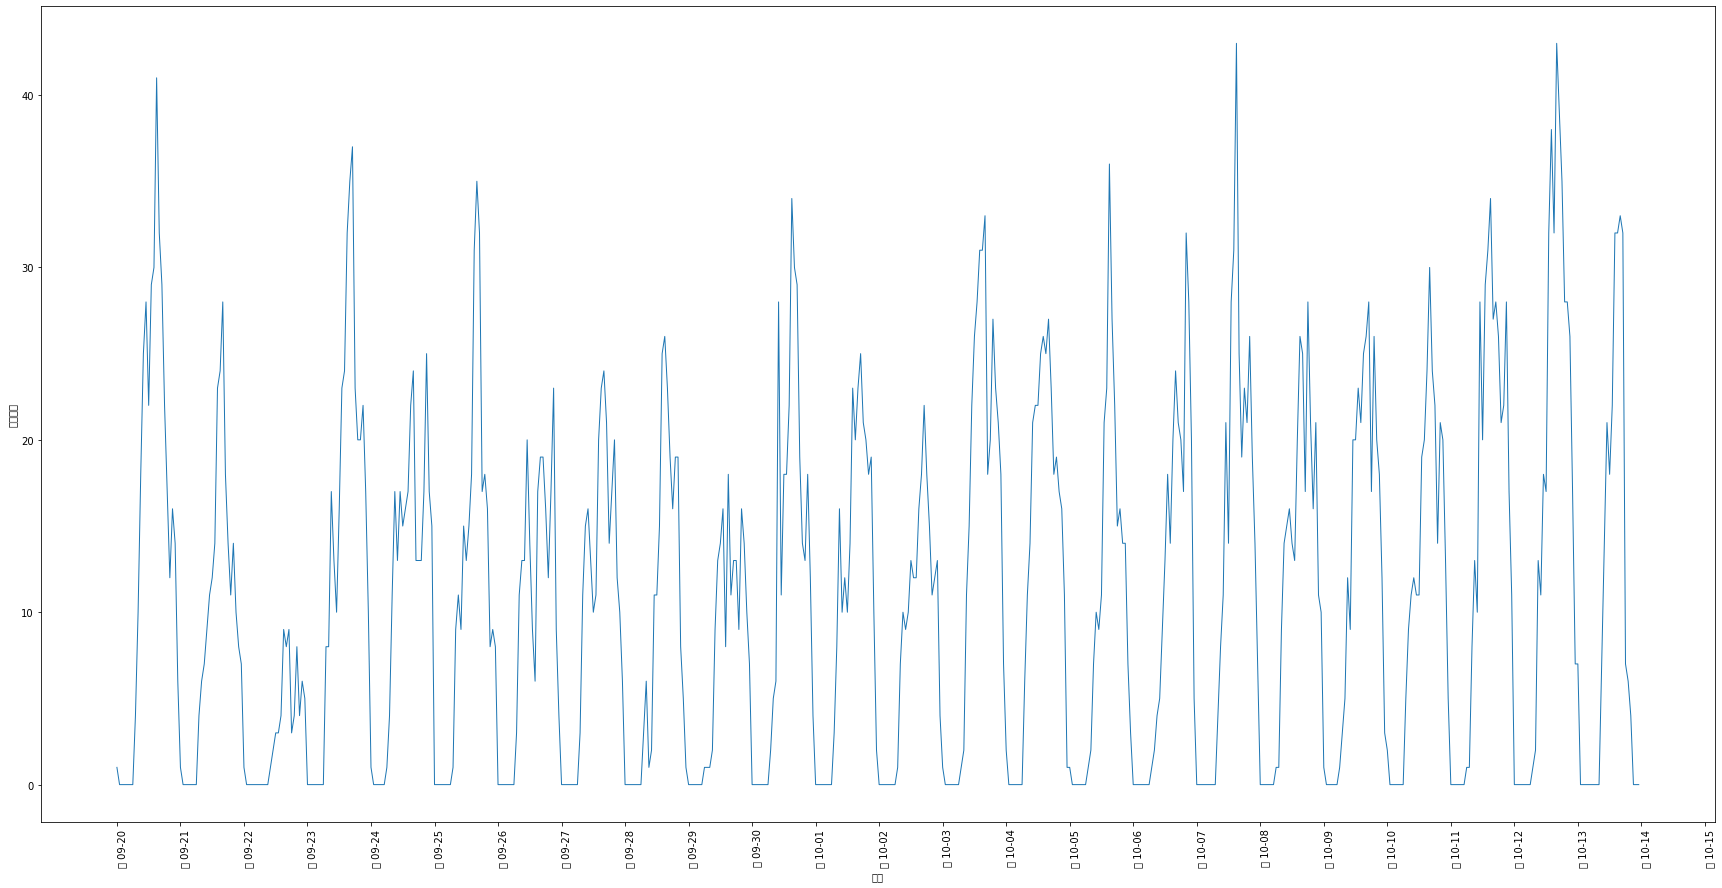

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-31')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['all_num'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [55]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 2019-09-20 00:00:00 to 2019-10-13 23:00:00
Data columns (total 19 columns):
date            576 non-null datetime64[ns]
all_num         576 non-null int64
temp            576 non-null float64
humid           576 non-null float64
co2             576 non-null float64
voc             576 non-null float64
pm25            576 non-null int64
light           576 non-null float64
noise           576 non-null float64
강수량             576 non-null float64
비               576 non-null int64
기온              576 non-null float64
풍속              576 non-null float64
date_day        576 non-null int64
date_hour       576 non-null int64
date_minute     576 non-null int64
date_weekday    576 non-null int64
real_number     576 non-null float64
congest1        576 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(7)
memory usage: 90.0 KB


In [56]:
# ap_data = ap_data[:576]

Text(0, 0.5, '대여횟수')

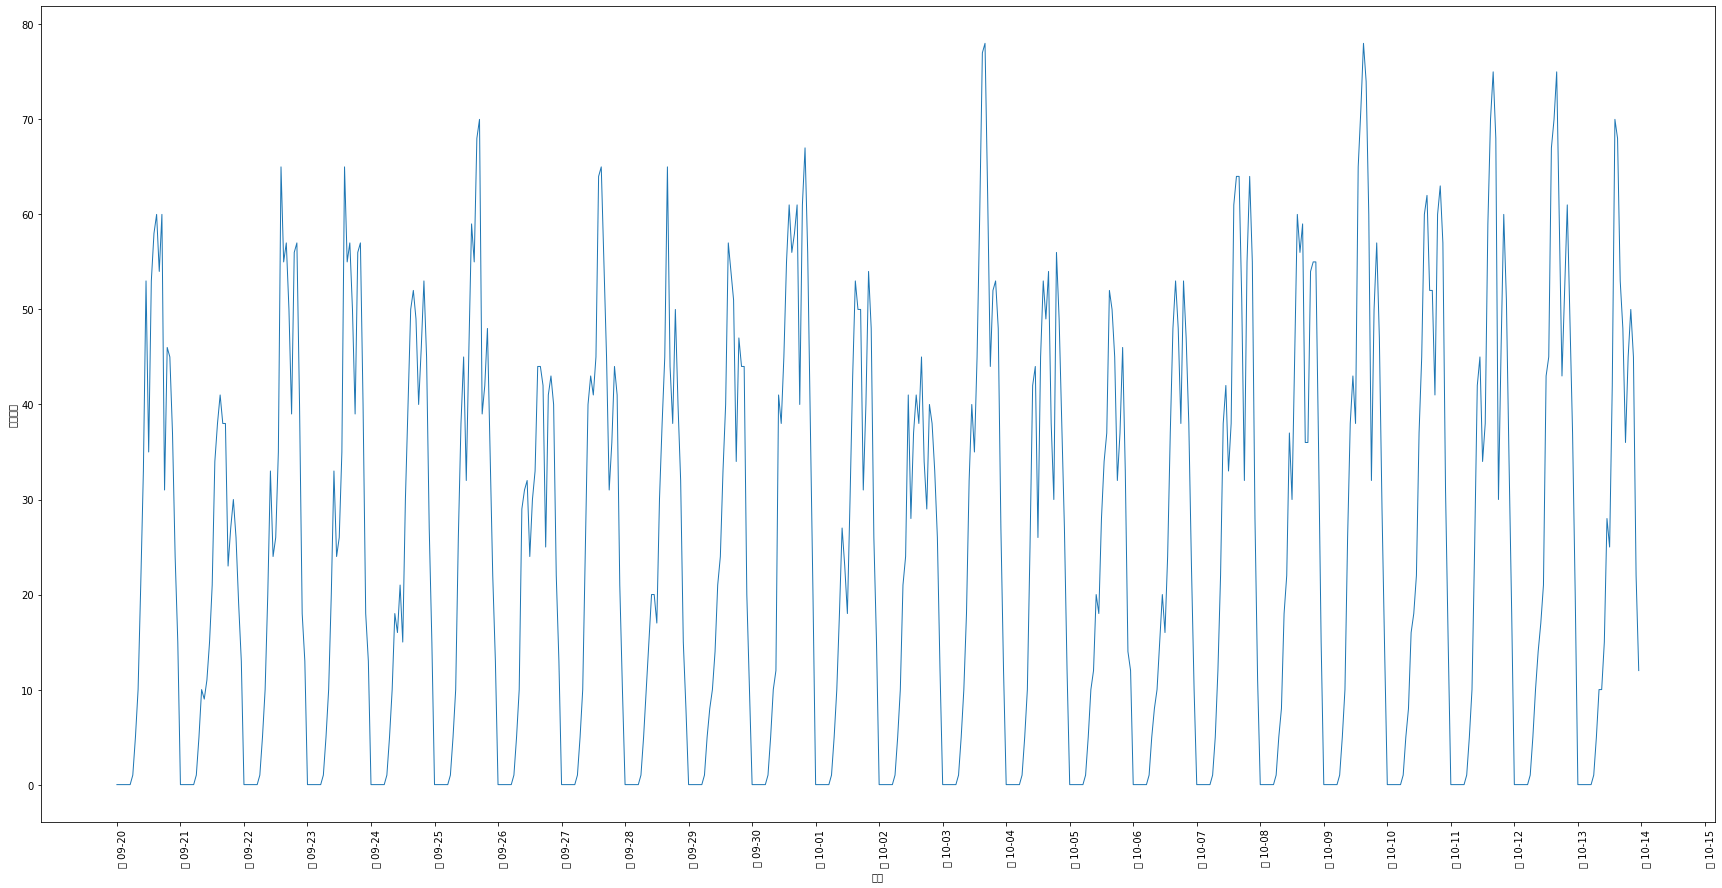

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-31')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['real_number'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [58]:
from sklearn.preprocessing import minmax_scale

df = pd.DataFrame()
df['date'] = ap_data['date']
df['all_num'] = minmax_scale(ap_data['all_num'], axis=0, copy=True)
df['real_number'] = minmax_scale(ap_data['real_number'], axis=0, copy=True)
#df['congest1'] = minmax_scale(ap_data['congest1'], axis=0, copy=True)
df['temp']= minmax_scale(ap_data['temp'], axis=0, copy=True)
df['humid']= minmax_scale(ap_data['humid'], axis=0, copy=True)
df['co2']= minmax_scale(ap_data['co2'], axis=0, copy=True)
df['voc']= minmax_scale(ap_data['voc'], axis=0, copy=True)
df['pm25']= minmax_scale(ap_data['pm25'], axis=0, copy=True)
df['light']= minmax_scale(ap_data['light'], axis=0, copy=True)
df['noise']= minmax_scale(ap_data['noise'], axis=0, copy=True)
df['hour']= minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['weekday']= minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df['강수량']= minmax_scale(ap_data['강수량'], axis=0, copy=True)
df['비']= minmax_scale(ap_data['비'], axis=0, copy=True)
df['기온']= minmax_scale(ap_data['기온'], axis=0, copy=True)
df['풍속']= minmax_scale(ap_data['풍속'], axis=0, copy=True)
df['day'] = minmax_scale(ap_data['date_day'], axis=0, copy=True)
df['hour'] = minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['minute'] = minmax_scale(ap_data['date_minute'], axis=0, copy=True)
df['weekday'] = minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df.set_index(df['date'], inplace=True)

In [59]:
# y = df['real_number'][:576]
X = df.index.astype("int64").values.reshape(-1,1)
y = ap_data['congest1']

In [60]:
X

array([[1568937600000000000],
       [1568941200000000000],
       [1568944800000000000],
       [1568948400000000000],
       [1568952000000000000],
       [1568955600000000000],
       [1568959200000000000],
       [1568962800000000000],
       [1568966400000000000],
       [1568970000000000000],
       [1568973600000000000],
       [1568977200000000000],
       [1568980800000000000],
       [1568984400000000000],
       [1568988000000000000],
       [1568991600000000000],
       [1568995200000000000],
       [1568998800000000000],
       [1569002400000000000],
       [1569006000000000000],
       [1569009600000000000],
       [1569013200000000000],
       [1569016800000000000],
       [1569020400000000000],
       [1569024000000000000],
       [1569027600000000000],
       [1569031200000000000],
       [1569034800000000000],
       [1569038400000000000],
       [1569042000000000000],
       [1569045600000000000],
       [1569049200000000000],
       [1569052800000000000],
       [15

In [61]:
y

date
2019-09-20 00:00:00    1.0
2019-09-20 01:00:00    1.0
2019-09-20 02:00:00    1.0
2019-09-20 03:00:00    1.0
2019-09-20 04:00:00    1.0
                      ... 
2019-10-13 19:00:00    3.0
2019-10-13 20:00:00    3.0
2019-10-13 21:00:00    3.0
2019-10-13 22:00:00    2.0
2019-10-13 23:00:00    2.0
Name: congest1, Length: 576, dtype: float64

In [62]:
y.isnull().sum()

0

In [78]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

n_train = 24*17
accuracy = []

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    print("y_test" , y_test)
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    print("y_pred", y_pred)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_pred)))
    
    plt.figure(figsize = (15,15))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 300, ha="left")
    
    plt.plot(range(n_train), y_train, label = "훈련")
    plt.plot(range(n_train, len(y_test) +  n_train), y_test, '-', label = "테스트")
    plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")  
    
#     print("훈련 세트 정확도: {:.3f}".format(regressor.score(y_test, y_pred)))

테스트 세트 R^2: 0.82
y_test date
2019-10-08 18:00:00    3.0
2019-10-08 19:00:00    3.0
2019-10-08 20:00:00    4.0
2019-10-08 21:00:00    4.0
2019-10-08 22:00:00    3.0
                      ... 
2019-10-13 19:00:00    3.0
2019-10-13 20:00:00    3.0
2019-10-13 21:00:00    3.0
2019-10-13 22:00:00    2.0
2019-10-13 23:00:00    2.0
Name: congest1, Length: 126, dtype: float64
y_pred [3.78099285 4.31342318 3.9717623  4.2448009  2.74809072 2.14753717
 1.02681184 0.97687474 1.00070612 1.00831751 1.01697855 1.00672262
 1.02530338 1.03337398 1.56613525 1.85799887 2.61067748 3.04023055
 2.778793   3.67938725 3.93978815 3.96809099 3.67566077 3.51447006
 3.10424096 4.40097257 4.40097257 4.34477344 2.75483434 2.20763507
 0.97114595 1.08545915 1.006998   0.99830553 1.00223592 0.99830553
 1.00327949 1.12852633 2.01125623 1.87334487 2.37620181 2.24714875
 2.21685868 2.92611657 3.24253168 3.60415907 4.2361746  3.48955896
 3.47669812 3.42467114 4.27145179 4.24778491 2.64169272 2.45793127
 1.00839031 1.006722

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

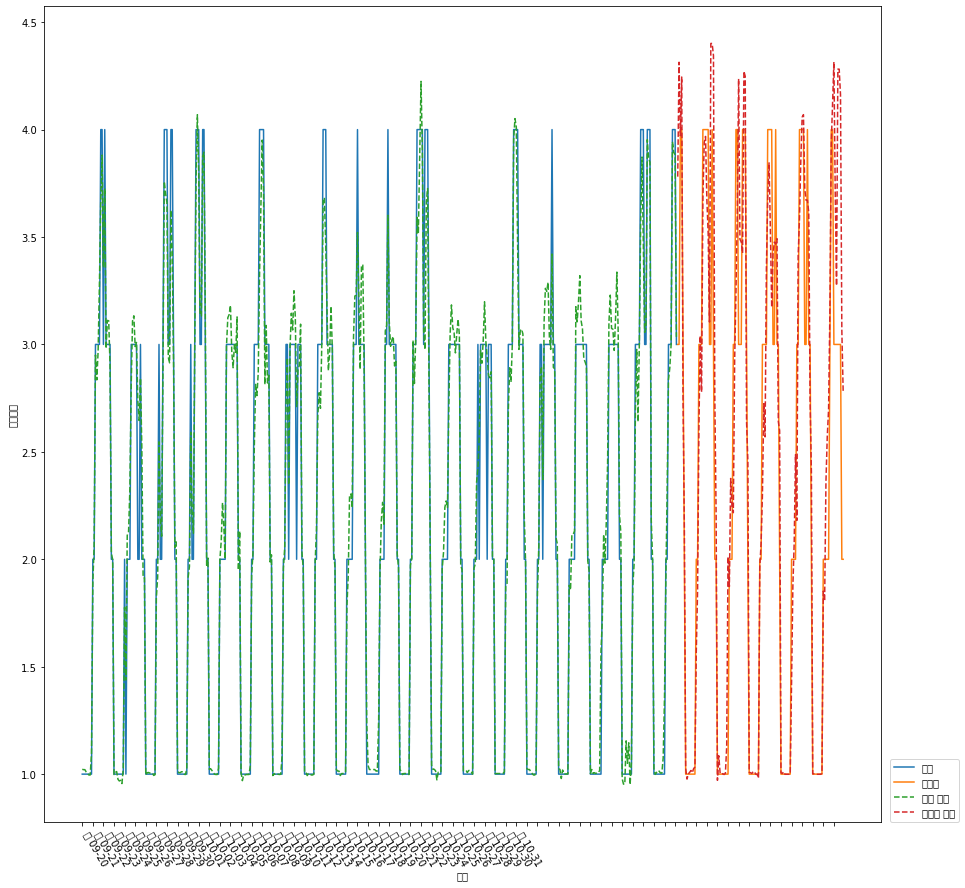

In [79]:

X_hour_week = np.hstack([df.hour.values.reshape(-1,1), df.기온.values.reshape(-1,1),
                       df.temp.values.reshape(-1,1),df.light.values.reshape(-1,1),
                        df.voc.values.reshape(-1,1),df.all_num.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, GradientBoostingRegressor())


In [65]:
accuracy

[]

In [431]:
# pd.DataFrame(np.transpose(yy1))

In [432]:
pd.concat(['date_data','predict'], axis = 1)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [418]:
date_data['predict']

datetime
2019-10-14 00:00:00   NaN
2019-10-14 01:00:00   NaN
2019-10-14 02:00:00   NaN
2019-10-14 03:00:00   NaN
2019-10-14 04:00:00   NaN
                       ..
2019-10-30 20:00:00   NaN
2019-10-30 21:00:00   NaN
2019-10-30 22:00:00   NaN
2019-10-30 23:00:00   NaN
2019-10-31 00:00:00   NaN
Name: predict, Length: 409, dtype: float64

In [419]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: -0.09


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

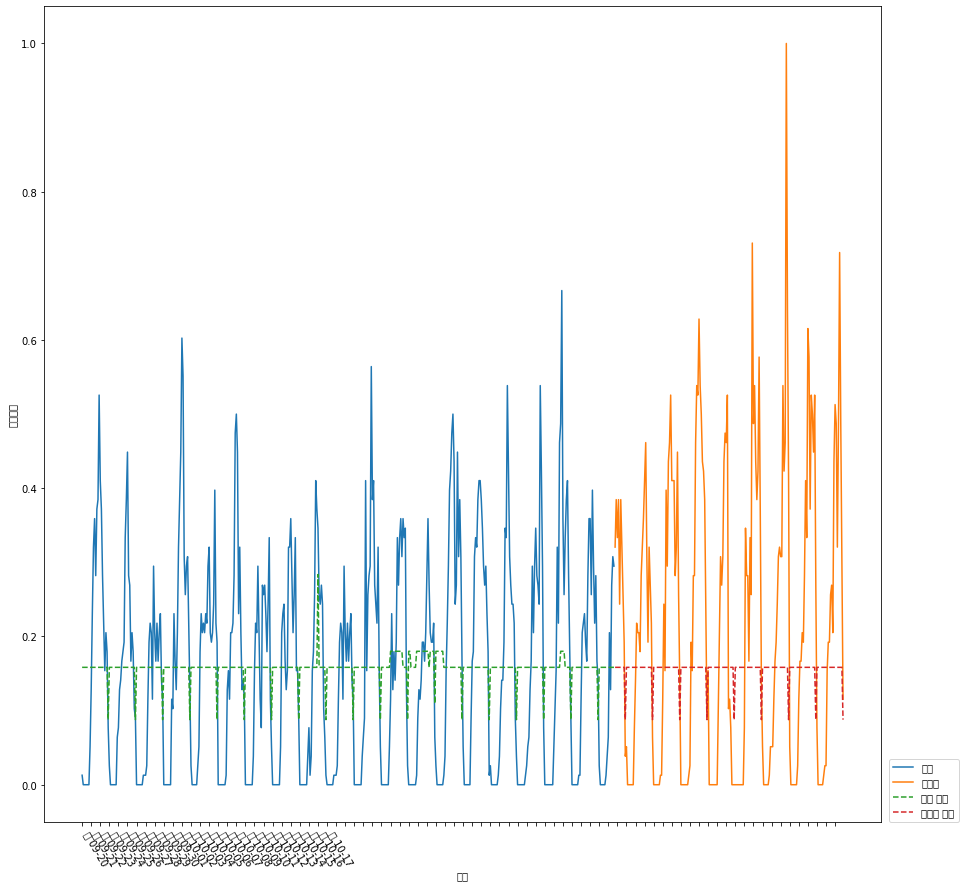

In [194]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: -0.09


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

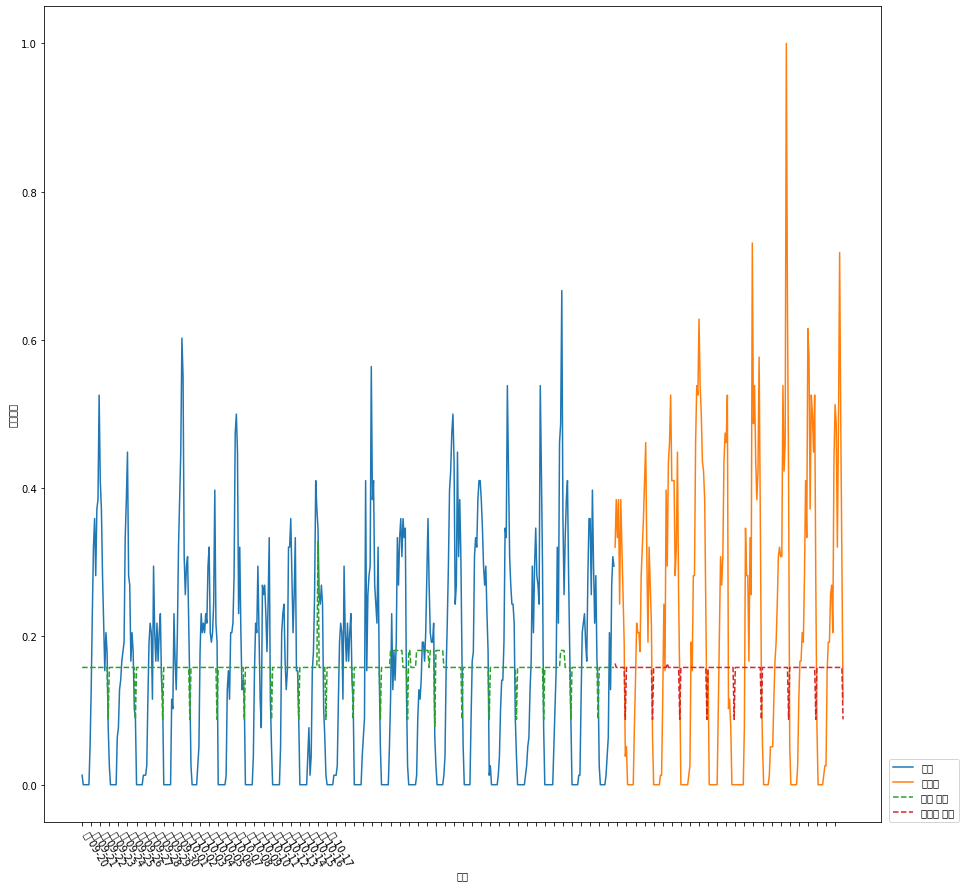

In [195]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [196]:
hour = ["%02d:00" % i for i in range(0, 24, 1)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [197]:
features_poly = poly_transformer.get_feature_names(features) # 모든 상호작용 특성에 이름을 달아줌

# 그리고 계수가 0이 아닌 것만 출력
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

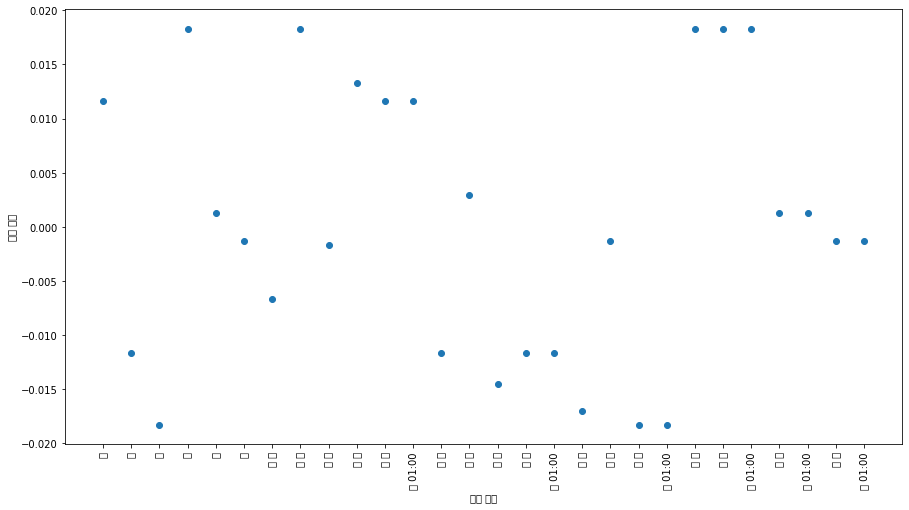

In [199]:
plt.figure(figsize=(15, 8))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X = ap_data[['date_day','date_hour','date_weekday','temp','humid','co2','voc','pm25','light','noise','기온','강수량','습도','풍속']].values.reshape(-1,14)
y = ap_data['all_num'].values.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)

score_train = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train))

# 1.000

score_test = gbc.score(x_test, y_test) # 일반화 정확도
print('{:.3f}'.format(score_test))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.000
0.363


In [44]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)
gbc.fit(x_train, y_train)

score_train_pre = gbc.score(x_train, y_train) # train set 정확도
print('{:.3f}'.format(score_train_pre))
# 0.995
score_test_pre = gbc.score(x_test, y_test) # 일반화 정확도
print('{:.3f}'.format(score_test_pre))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.851
0.363


In [45]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train_lr = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train_lr))

# 0.995



score_test_lr = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test_lr))

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.812
0.369


In [46]:
# import matplotlib

# import matplotlib.pyplot as plt

# import numpy as np



# score_set = np.round([score_train, score_test], 3)

# max_depth_score_set = np.round([score_train_pre, score_test_pre], 3)

# learning_rete_score_set = np.round([score_train_lr, score_test_lr], 3)



# index = np.arange(len(score_set))

# bar_width = 0.35

# bottom = 0.8

# list_set = [max_depth_score_set, learning_rete_score_set]

# line_set = ['--', ':']

# names = ['train', 'test']



# for i, line_set, name in zip(index, line_set, names):

#     plt.hlines(score_set[i], xmin=0-bar_width,

#                xmax=index[-1]+2*bar_width,

#                linestyle=line_set, label='default {}'.format(name))

#     plt.text(0-bar_width, score_set[i]+0.005, str(score_set[i]))



# plt.bar(index, max_depth_score_set, width=bar_width, label='adj max_depth')

# plt.bar(index+bar_width, learning_rete_score_set, width=bar_width, label='adj learning rate')

# for i, ts, te in zip(index, max_depth_score_set, learning_rete_score_set):

#     plt.text(i, (bottom+ts)/2, str(ts), horizontalalignment='center')

#     plt.text(i+bar_width, (bottom+te)/2, str(te), horizontalalignment='center')



# plt.ylim(bottom, 1.05)

# plt.xticks(index+bar_width/2, names)

# plt.ylabel('score', size=15)

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False)

# plt.show()

In [47]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(x_train, y_train)

n_feature = 

index=np.arange(n_feature)



plt.barh(index, gbc.feature_importances_, align='center')

plt.yticks(index, cancer.feature_names)

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 



SyntaxError: invalid syntax (<ipython-input-47-3cdd536d77fe>, line 5)